### Importing libraries

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

### Importing dataset



In [2]:
dataset = pd.read_csv('D:/Mall_Customers.csv')


In [3]:
dataset.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

### Checking for null values



In [4]:
dataset.isna().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Exploratory Data Analysis (EDA)



In [5]:
dataset.shape


(200, 5)

In [6]:
dataset.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
dataset.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [8]:
dataset.isna().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Count Plot of Age

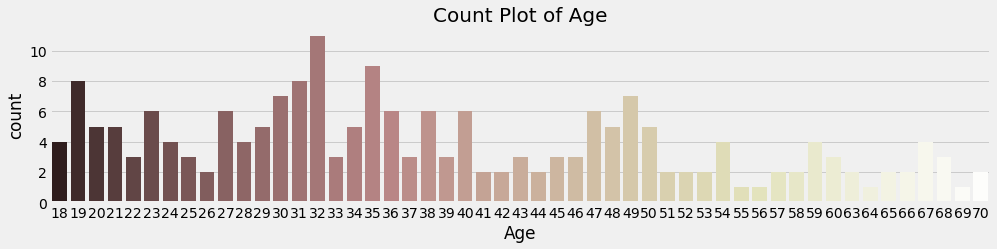

In [9]:
plt.rcParams['figure.figsize'] = (15, 3)
sns.countplot(dataset['Age'], palette = 'pink')
plt.title('Count Plot of Age', fontsize = 20)
plt.show()


#### Count Plot of Gender

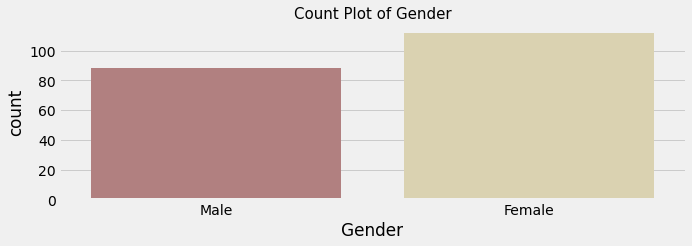

In [10]:
plt.rcParams['figure.figsize'] = (10, 3)
sns.countplot(dataset['Gender'], palette = 'pink')
plt.title('Count Plot of Gender', fontsize = 15)
plt.show()


#### Defining scatter plot function

In [11]:
def scatters(col1,col2):
    fig = px.scatter(dataset, x=col1, y=col2 , color="Gender")
    return fig.show()


In [12]:
scatters('Annual Income (k$)', 'Spending Score (1-100)')


In [13]:
scatters('Age', 'Spending Score (1-100)')


In [14]:
scatters('Age', 'Annual Income (k$)')


#### Defining kde_plot plot function

In [15]:
def kde_plot(feature):
    grid = sns.FacetGrid(dataset,aspect=4)
    grid.map(sns.kdeplot, feature)
    grid.add_legend()

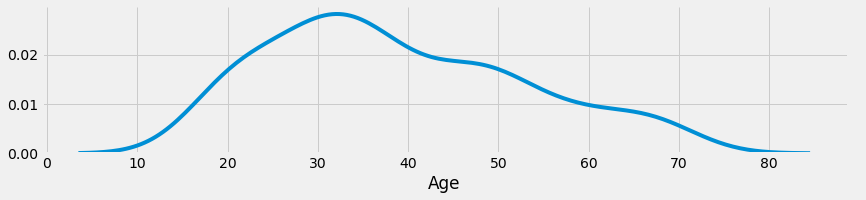

In [16]:
kde_plot('Age')


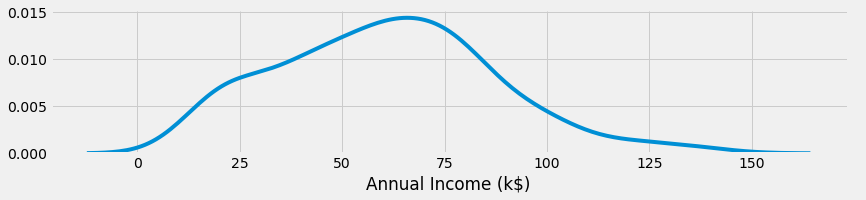

In [17]:
kde_plot('Annual Income (k$)')


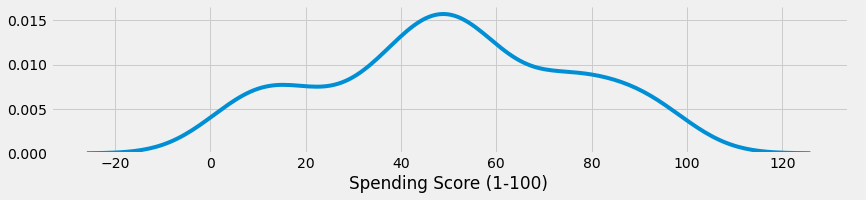

In [18]:
kde_plot('Spending Score (1-100)')


### Check Outliers



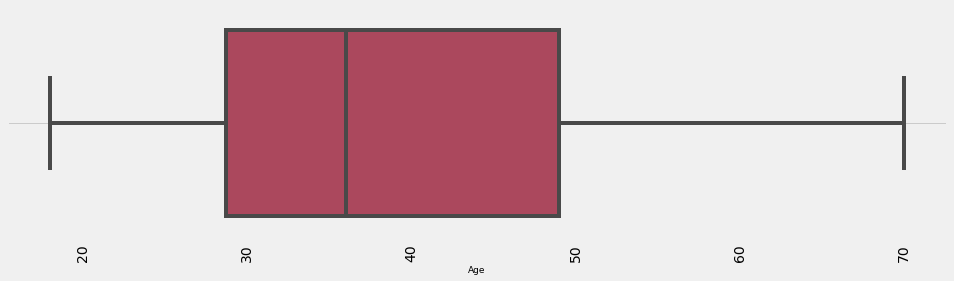

In [19]:
plt.rcParams['figure.figsize'] = (15, 4)
ax = sns.boxplot(x = dataset['Age'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Age', fontsize = 9)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

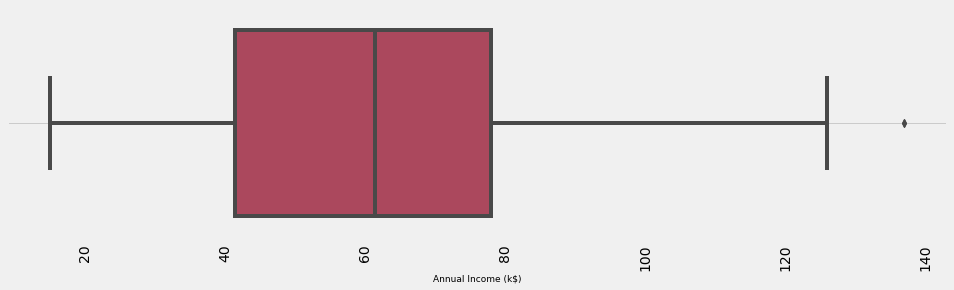

In [22]:
plt.rcParams['figure.figsize'] = (15, 4)
ax = sns.boxplot(x = dataset['Annual Income (k$)'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Annual Income (k$)', fontsize = 9)
plt.xticks(rotation = 90)
plt.grid()
plt.show()


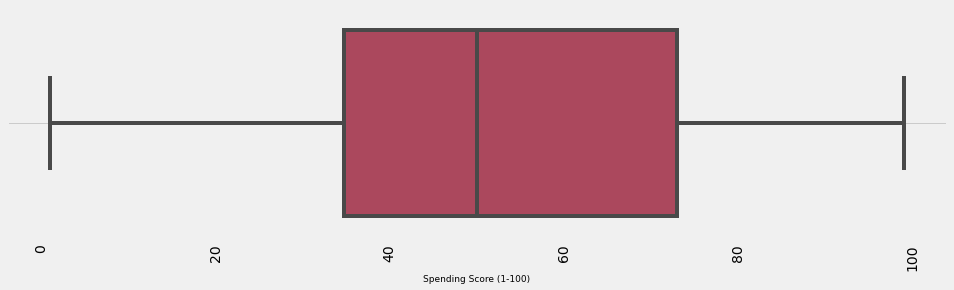

In [21]:
plt.rcParams['figure.figsize'] = (15, 4)
ax = sns.boxplot(x = dataset['Spending Score (1-100)'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Spending Score (1-100)', fontsize = 9)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

## K-Means Clustering Algorithm




### kmeans clustering using `Annual Income (k$)`and `Spending Score` columns

#### Importing the dataset

In [23]:
X = dataset.iloc[:, [3, 4]].values


#### Using the Elbow method to find the optimal number of clusters

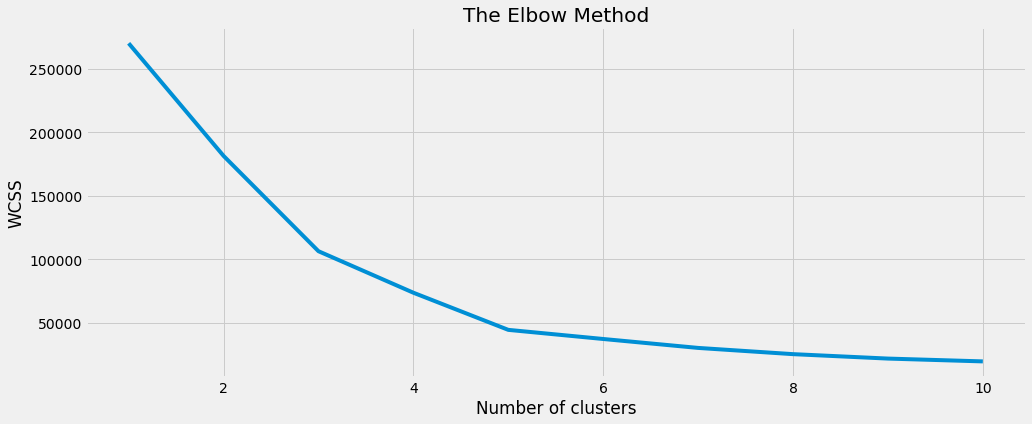

In [24]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(1 , figsize = (15 ,6))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Training the K-Means model on the dataset

In [25]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

#### Visualising the clusters

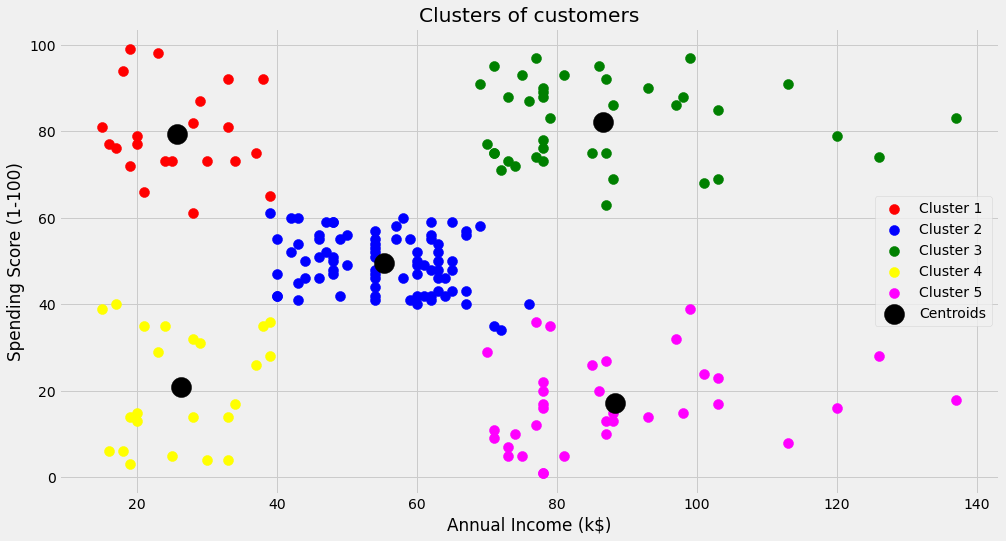

In [26]:
plt.figure(1 , figsize = (15 ,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 400, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#### kmeans clustering using Age and Spending Score columns

In [27]:
Z = dataset.loc[:, ['Age', 'Spending Score (1-100)']].values


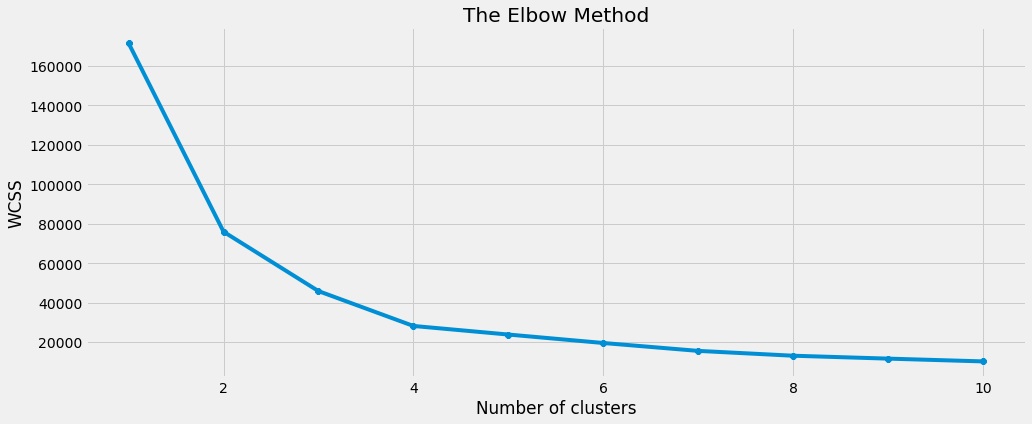

In [28]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Z)
    wcss.append(kmeans.inertia_)
plt.figure(1 , figsize = (15 ,6))
plt.plot(range(1, 11), wcss , marker = '8')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [29]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(Z)

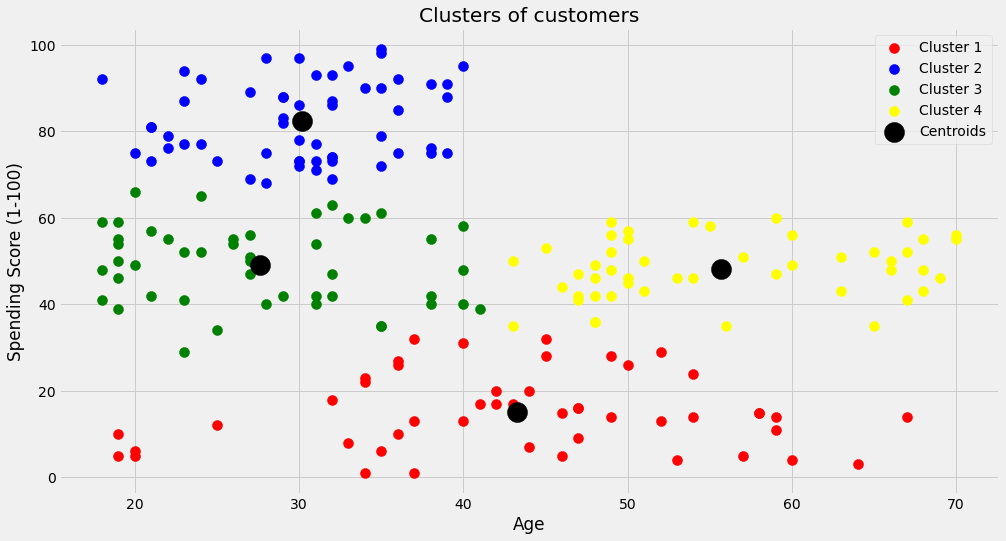

In [30]:
plt.figure(1 , figsize = (15 ,8))
plt.scatter(Z[y_kmeans == 0, 0], Z[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Z[y_kmeans == 1, 0], Z[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Z[y_kmeans == 2, 0], Z[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(Z[y_kmeans == 3, 0], Z[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 400, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### kmeans clustering using `Age` and `Annual Income (k$)` columns

In [31]:
Y = dataset.loc[:, ['Age', 'Annual Income (k$)']].values


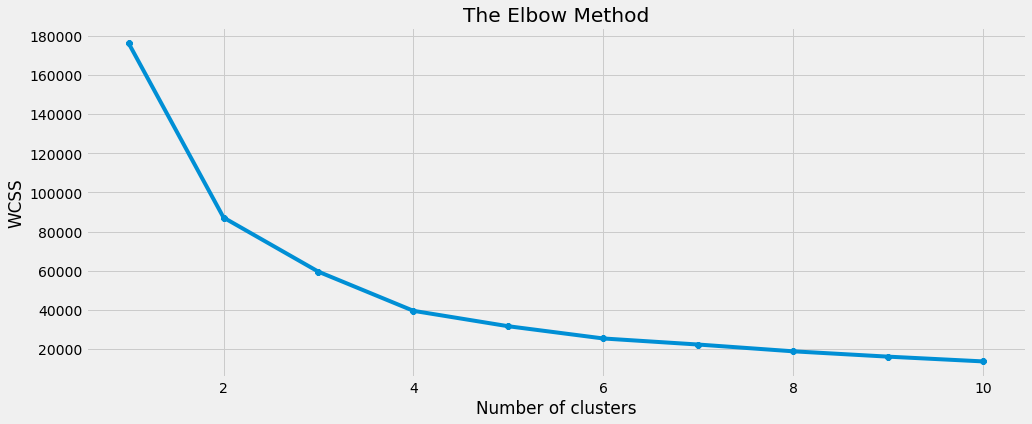

In [32]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Y)
    wcss.append(kmeans.inertia_)
plt.figure(1 , figsize = (15 ,6))
plt.plot(range(1, 11), wcss , marker = '8')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(Y)

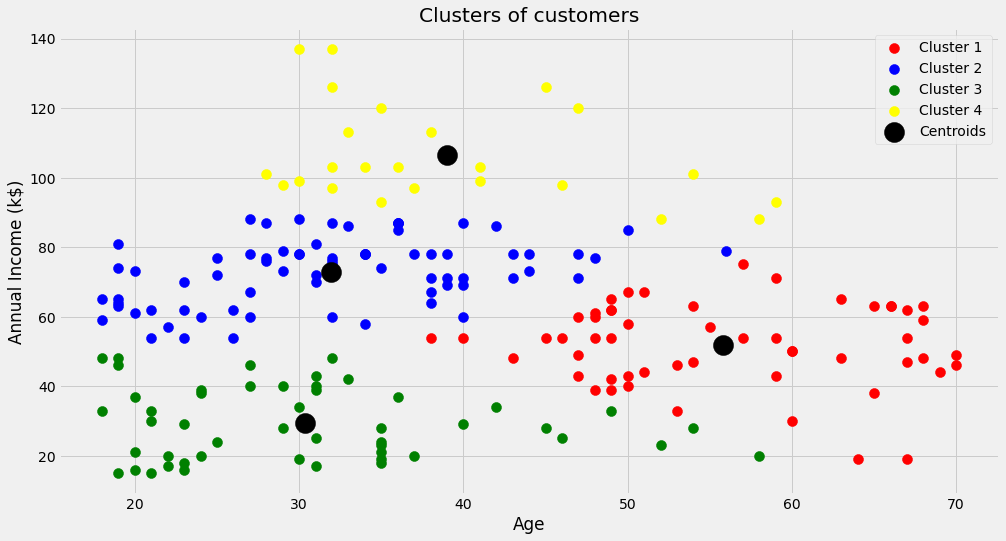

In [34]:
plt.figure(1 , figsize = (15 ,8))
plt.scatter(Y[y_kmeans == 0, 0], Y[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Y[y_kmeans == 1, 0], Y[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Y[y_kmeans == 2, 0], Y[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(Y[y_kmeans == 3, 0], Y[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 400, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

### Segmentation using`Age` , `Annual Income` and `Spending Score`

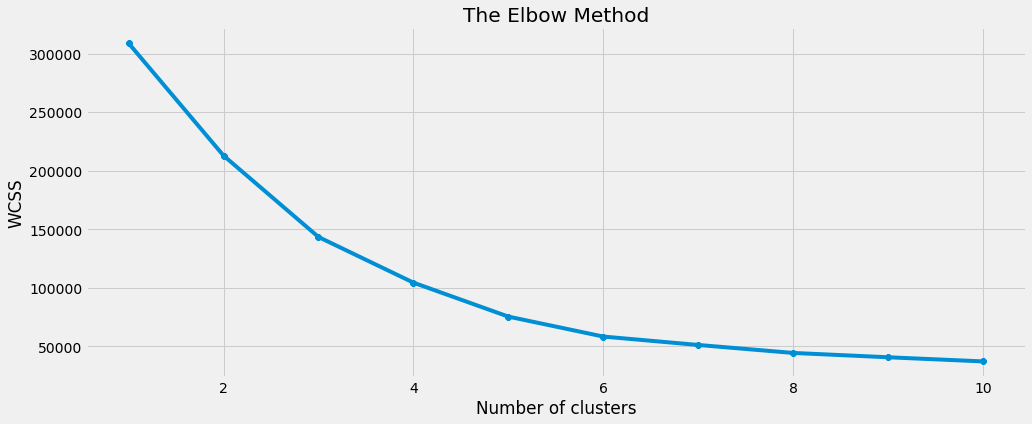

In [35]:
A = dataset.iloc[:, 2:]
wcss = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(A)
    wcss.append(algorithm.inertia_)
plt.figure(1 , figsize = (15 ,6))
plt.plot(range(1, 11), wcss , marker = '8')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
kmeans = KMeans(n_clusters = 6)
clusters = kmeans.fit_predict(A)
A['label'] = clusters

In [37]:
fig = px.scatter_3d(A, x="Annual Income (k$)", y="Spending Score (1-100)", z="Age",
                    color = 'label', size = 'label')
fig.show()